#Preparation

In [ ]:
!pip install pybind11


In [ ]:
!pip install cvxpy


In [ ]:
!pip install riskfolio-lib

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

In [ ]:
df = pd.read_csv('/content/cotation_final.csv')

In [ ]:
print(df)

        Unnamed: 0        date          CODE             Name      open  \
0                0  2008-01-02        725001            ADWYA 330.0000%   
1                1  2008-01-03        725001            ADWYA 338.0000%   
2                2  2008-01-04        725001            ADWYA 335.0000%   
3                3  2008-01-07        725001            ADWYA 334.0000%   
4                4  2008-01-10        725001            ADWYA 334.0000%   
...            ...         ...           ...              ...       ...   
294066      294066  2023-12-25  TN0007200017  WIFACK INT BANK 854.0000%   
294067      294067  2023-12-26  TN0007200017  WIFACK INT BANK 854.0000%   
294068      294068  2023-12-27  TN0007200017  WIFACK INT BANK 860.0000%   
294069      294069  2023-12-28  TN0007200017  WIFACK INT BANK 860.0000%   
294070      294070  2023-12-29  TN0007200017  WIFACK INT BANK 870.0000%   

           close       low      high  volume  NB_TRANSACTION  CAPITAUX IND_RES  
0      339.0000% 3

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294071 entries, 0 to 294070
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        294071 non-null  int64  
 1   date              294069 non-null  object 
 2   CODE              294071 non-null  object 
 3   Name              294071 non-null  object 
 4   open              294071 non-null  float64
 5   close             294071 non-null  float64
 6   low               294071 non-null  float64
 7   high              294071 non-null  float64
 8   volume            294071 non-null  int64  
 9   NB_TRANSACTION    294071 non-null  int64  
 10  CAPITAUX IND_RES  294071 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 24.7+ MB


In [ ]:
asset_names = df['Name'].unique()
print(asset_names)

['ADWYA' 'AETECH' 'AIR LIQUIDE TSIE' 'ALKIMIA' 'AMEN BANK' 'AMS' 'ARTES'
 'ASS MULTI ITTIHAD' 'ASSAD' 'ASSUR MAGHREBIA' 'ASSURANCES SALIM' 'ASTREE'
 'ATB' 'ATELIER MEUBLE INT' 'ATL' 'ATTIJARI' 'ATTIJARI LEASING'
 'Autres Lignes' 'BEST LEASE' 'BH' 'BH ASSURANCE' 'BH LEASING' 'BIAT'
 'BNA' 'BT' 'BTE (ADP)' 'CARTHAGE CEMENT' 'CELLCOM' 'CEREALIS' 'CIL'
 'CIMENTS DE BIZERTE' 'CITY CARS' 'DELICE HOLDING' 'EL MAZRAA'
 'EL WIFACK LEASING' 'ELBEN INDUSTRIE' 'ELECTROSTAR' 'ENNAKL AUTOMOBILES'
 'ESSOUKNA' 'EUROCYCLES' 'GENERAL LEASING' 'GIFFILITER' 'HANNIBAL LEASE'
 'HEXABYTE' 'ICF' 'KARTHAGO AIRLINES' 'LA CARTE (CI)' 'LAND OR'
 'MAGASIN GENERAL' 'MAGHREB INTERN PUB' 'MIP' 'MODERN LEASING' 'MONOPRIX'
 'MPBS' 'NEW BODY LINE' 'OFFICEPLAST' 'ONE TECH HOLDING' 'PALM BEACH (AA)'
 'PALM BEACH (ADP)' 'PLAC. TSIE-SICAF' 'POULINA GP HOLDING' 'SAH' 'SALIM'
 'SANIMED' 'SERVICOM' 'SFBT' 'SIAME' 'SIMPAR' 'SIPHAT' 'SITEX' 'SITS'
 'SMART TUNISIE' 'SOMOCER' 'SOPAT' 'SOTEMAIL' 'SOTETEL' 'SOTIPAPIER'
 'SOTRAPIL' '

In [ ]:
num_assets = df['Name'].nunique()
print("Number of assets:", num_assets)

Number of assets: 102


In [ ]:
assets = df['Name'].unique().tolist()

In [ ]:
print(assets)

['ADWYA', 'AETECH', 'AIR LIQUIDE TSIE', 'ALKIMIA', 'AMEN BANK', 'AMS', 'ARTES', 'ASS MULTI ITTIHAD', 'ASSAD', 'ASSUR MAGHREBIA', 'ASSURANCES SALIM', 'ASTREE', 'ATB', 'ATELIER MEUBLE INT', 'ATL', 'ATTIJARI', 'ATTIJARI LEASING', 'Autres Lignes', 'BEST LEASE', 'BH', 'BH ASSURANCE', 'BH LEASING', 'BIAT', 'BNA', 'BT', 'BTE (ADP)', 'CARTHAGE CEMENT', 'CELLCOM', 'CEREALIS', 'CIL', 'CIMENTS DE BIZERTE', 'CITY CARS', 'DELICE HOLDING', 'EL MAZRAA', 'EL WIFACK LEASING', 'ELBEN INDUSTRIE', 'ELECTROSTAR', 'ENNAKL AUTOMOBILES', 'ESSOUKNA', 'EUROCYCLES', 'GENERAL LEASING', 'GIFFILITER', 'HANNIBAL LEASE', 'HEXABYTE', 'ICF', 'KARTHAGO AIRLINES', 'LA CARTE (CI)', 'LAND OR', 'MAGASIN GENERAL', 'MAGHREB INTERN PUB', 'MIP', 'MODERN LEASING', 'MONOPRIX', 'MPBS', 'NEW BODY LINE', 'OFFICEPLAST', 'ONE TECH HOLDING', 'PALM BEACH (AA)', 'PALM BEACH (ADP)', 'PLAC. TSIE-SICAF', 'POULINA GP HOLDING', 'SAH', 'SALIM', 'SANIMED', 'SERVICOM', 'SFBT', 'SIAME', 'SIMPAR', 'SIPHAT', 'SITEX', 'SITS', 'SMART TUNISIE', 'SOMOC

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Find the minimum and maximum dates
min_date = df['date'].min()
max_date = df['date'].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2008-01-02 00:00:00
Maximum date: 2023-12-29 00:00:00


This code calculates the daily returns of stocks from our dataest.

In [ ]:
# Assuming 'df' is your DataFrame with the 'open' prices for each asset
data = df.pivot_table(index='date', columns='Name', values='open')
Y = data.pct_change().dropna()

# Displaying the first few rows of Y
print(Y.head())

Name          ADWYA  AETECH  AIR LIQUIDE TSIE  ALKIMIA  AMEN BANK      AMS  \
date                                                                         
2021-12-28 -1.8828% 0.0000%           0.0000%  0.0000%   -1.0373% -0.5319%   
2021-12-29 -0.8529% 0.0000%           0.0288%  0.0000%    1.9179% -0.5348%   
2021-12-30 -0.8602% 0.0000%          -0.6296%  4.5921%    2.8446% -0.5376%   
2021-12-31  1.9523% 0.0000%          -0.6336%  4.3905%    1.9574% -0.5405%   
2022-01-03  1.0638% 0.0000%           0.0000%  0.0000%    1.0017%  0.0000%   

Name          ARTES  ASS MULTI ITTIHAD    ASSAD  ASSUR MAGHREBIA  ...  \
date                                                              ...   
2021-12-28  0.8333%            2.5641% -1.8182%         -0.5786%  ...   
2021-12-29 -1.9835%            2.0000%  1.2346%          0.0000%  ...   
2021-12-30  3.2040%            1.9608%  2.4390%          0.0000%  ...   
2021-12-31 -0.1634%           -1.4423%  0.0000%          1.4127%  ...   
2022-01-03  1.1

=>The values in the table represent the percentage change in the closing price of each stock compared to the previous day's closing price.
For example, a value of -77.2640% in the cell for 'ADWYA' on '2020-12-30' means that the asset 'ADWYA' had a return of -77.2640% on December 30, 2020.

In [ ]:
# Assuming 'Y' is your DataFrame containing the returns
Y.replace('0.0000%', np.nan, inplace=True)  # Replace '0.0000%' with NaN
Y.fillna('0.0001%', inplace=True)  # Replace NaN with a small non-zero value

# Convert the percentage strings to floats
Y = Y.replace({'%': ''}, regex=True).astype(float)

# Now calculate the daily returns
returns = Y.pct_change().dropna()

# Displaying the first few rows of returns
display(returns.head())

Name,ADWYA,AETECH,AIR LIQUIDE TSIE,ALKIMIA,AMEN BANK,AMS,ARTES,ASS MULTI ITTIHAD,ASSAD,ASSUR MAGHREBIA,...,TUNIS RE,TUNISAIR,TUNISIE LAIT,TUNISIE LEASING,TUNISIE VALEURS,UADH,UBCI,UIB,UNIMED,WIFACK INT BANK
date,,,,,,,,,,,,,,,,,,,,,
2021-12-29,-54.7027%,0.0000%,188.4615%,0.0000%,-284.8967%,0.5348%,-338.0165%,-22.0000%,-167.9012%,-101.7282%,...,-1182.4217%,-1.8182%,0.0000%,-0.0554%,0.0000%,-2.0979%,-0.2532%,-650.7392%,-241.9048%,-99.7767%
2021-12-30,0.8602%,0.0000%,-2282.7037%,45821.0526%,48.3182%,0.5376%,-261.5374%,-1.9608%,97.5610%,0.0000%,...,0.9200%,-1.7857%,0.0000%,-0.0553%,0.0000%,-2.0548%,-96.0500%,360.2341%,-121.0280%,14185.7143%
2021-12-31,-326.9523%,0.0000%,0.6336%,-4.3905%,-31.1882%,0.5405%,-105.0998%,-173.5577%,-99.5900%,14026.9841%,...,-208.6923%,-99.4400%,0.0000%,-0.0553%,0.0000%,-2.0134%,0.0000%,-81.0373%,435.4781%,-1.4085%
2022-01-03,-45.5083%,0.0000%,-101.5782%,-99.7722%,-48.8278%,-101.8500%,-801.1457%,1.4634%,-6052.3810%,-101.1079%,...,-0.9901%,0.0000%,0.0000%,-0.0553%,0.0000%,-99.5033%,0.0000%,-0.6410%,-170.2568%,-1.3889%
2022-01-04,-99.0600%,0.0000%,-11976.9470%,0.0000%,-79.3733%,0.0000%,-99.1271%,-32.3432%,201.7964%,-163.8900%,...,-98.9900%,17443.8596%,0.0000%,-81.9100%,0.0000%,-26415.7895%,0.0000%,-795.5414%,-207.4715%,-415.6164%


#Classic Mean Risk Optimization

**1-Estimating Mean Variance Portfolios:**

*This approach, commonly associated with Modern Portfolio Theory (MPT), aims to maximize the expected return of a portfolio for a given level of risk or minimize the risk for a given level of expected return. The optimization process considers the mean (expected return) and variance (or standard deviation) of the portfolio's returns. The goal is to find the mix of assets that provides the best trade-off between risk and return. The Sharpe ratio is often used as a measure of risk-adjusted return in mean-variance optimization.*

In [ ]:
import riskfolio as rp

# Building the portfolio object with returns data
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# Display the optimal portfolio weights
display(w.T)

You must convert self.cov to a positive definite matrix


,ADWYA,AETECH,AIR LIQUIDE TSIE,ALKIMIA,AMEN BANK,AMS,ARTES,ASS MULTI ITTIHAD,ASSAD,ASSUR MAGHREBIA,...,TUNIS RE,TUNISAIR,TUNISIE LAIT,TUNISIE LEASING,TUNISIE VALEURS,UADH,UBCI,UIB,UNIMED,WIFACK INT BANK
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,5.8335%,0.0000%,5.8335%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


These weights indicate the percentage of the total portfolio value that should be invested in each asset to achieve the optimal risk-return tradeoff. For example, the model suggests allocating 85.7039% of the portfolio to SFBT and 10.7128% to UIB, while the other assets receive smaller allocations. The weights are normalized so that they sum up to 100%.

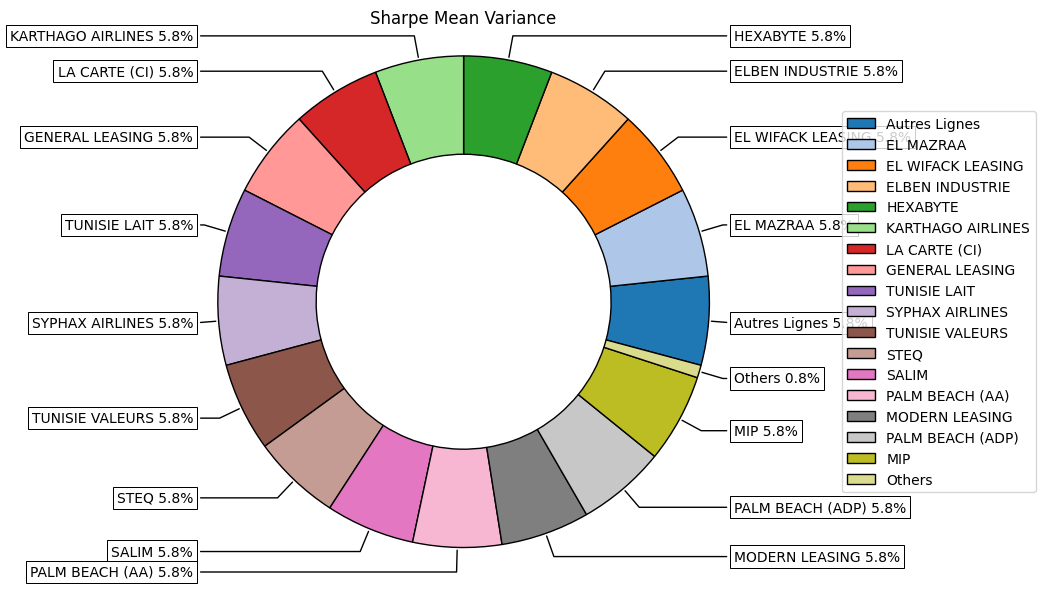

In [ ]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [ ]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,ADWYA,AETECH,AIR LIQUIDE TSIE,ALKIMIA,AMEN BANK,AMS,ARTES,ASS MULTI ITTIHAD,ASSAD,ASSUR MAGHREBIA,...,TUNIS RE,TUNISAIR,TUNISIE LAIT,TUNISIE LEASING,TUNISIE VALEURS,UADH,UBCI,UIB,UNIMED,WIFACK INT BANK
0,0.0415%,0.0158%,0.0252%,0.0204%,0.0247%,0.0100%,0.0175%,0.0168%,0.0074%,0.0122%,...,0.0225%,0.0215%,5.4597%,0.0169%,5.4597%,0.0039%,0.0273%,0.0145%,0.0134%,0.0271%
1,2.0800%,0.0000%,0.0000%,0.0000%,1.7226%,0.0000%,0.3101%,0.0000%,0.0000%,0.0000%,...,0.2101%,0.0000%,3.6411%,1.0070%,3.6411%,0.3964%,0.9694%,0.8808%,0.0000%,1.5087%
2,4.0970%,0.0000%,0.0000%,0.0000%,3.3931%,0.0000%,0.6109%,0.0000%,0.0000%,0.0000%,...,0.4138%,0.0000%,1.7840%,1.9836%,1.7840%,0.7808%,1.9095%,1.7350%,0.0000%,2.9718%
3,6.0533%,0.0000%,0.0000%,0.0000%,5.0730%,0.0000%,0.8752%,0.0000%,0.0000%,0.0000%,...,0.5806%,0.0000%,0.0000%,2.9559%,0.0000%,1.1825%,2.7955%,2.6222%,0.0000%,4.3698%
4,4.6844%,0.0000%,0.0000%,0.0000%,6.2576%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,3.2528%,0.0000%,2.3578%,0.6830%,4.2722%,0.0000%,2.6795%


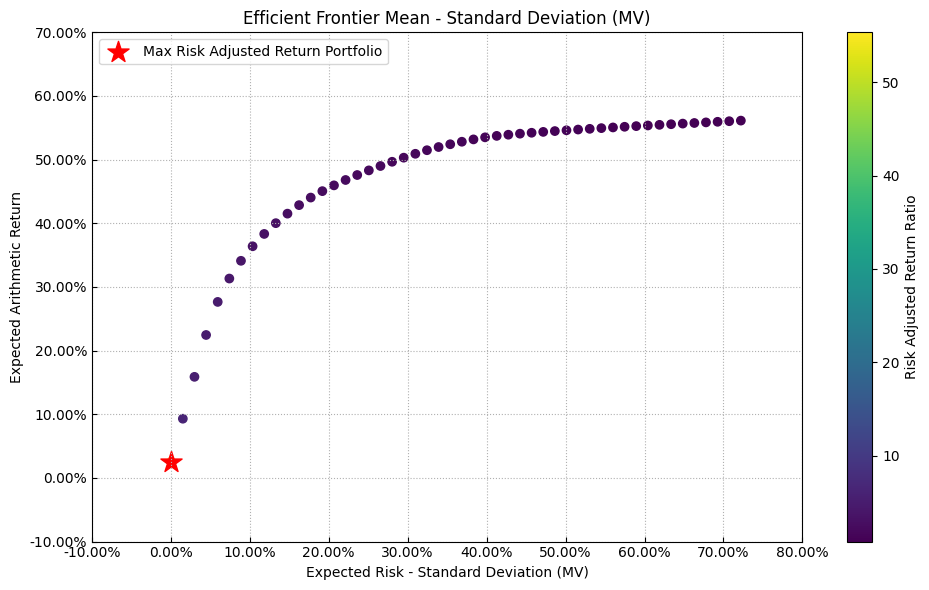

In [ ]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

This visualization helps investors visualize the trade-off between risk and return and identify the optimal portfolio for their investment objectives.

**2-Estimating Mean Risk Portfolios:**

*This approach expands the concept of risk beyond just variance or standard deviation. It considers alternative risk measures that capture different aspects of risk, such as downside risk, tail risk, or extreme losses. Common risk measures used in mean risk portfolios include Conditional Value at Risk (CVaR), also known as Expected Shortfall, and Value at Risk (VaR). The objective is to find portfolios that maximize return relative to these risk measures, providing a more nuanced view of risk compared to traditional mean-variance optimization.*

In [ ]:
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,ADWYA,AETECH,AIR LIQUIDE TSIE,ALKIMIA,AMEN BANK,AMS,ARTES,ASS MULTI ITTIHAD,ASSAD,ASSUR MAGHREBIA,...,TUNIS RE,TUNISAIR,TUNISIE LAIT,TUNISIE LEASING,TUNISIE VALEURS,UADH,UBCI,UIB,UNIMED,WIFACK INT BANK
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,5.5551%,0.0000%,5.5544%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


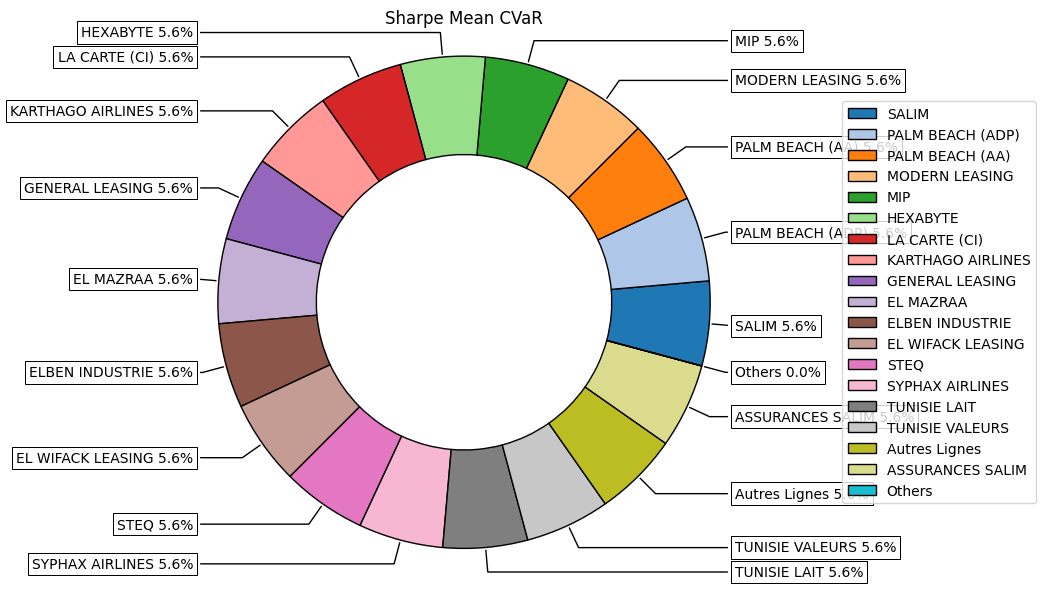

In [ ]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


In [ ]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,ADWYA,AETECH,AIR LIQUIDE TSIE,ALKIMIA,AMEN BANK,AMS,ARTES,ASS MULTI ITTIHAD,ASSAD,ASSUR MAGHREBIA,...,TUNIS RE,TUNISAIR,TUNISIE LAIT,TUNISIE LEASING,TUNISIE VALEURS,UADH,UBCI,UIB,UNIMED,WIFACK INT BANK
0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,5.5556%,0.0000%,5.5556%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
1,1.5321%,0.1084%,0.0000%,0.0000%,0.2918%,0.2844%,0.1927%,0.0000%,0.0000%,0.0000%,...,0.1587%,0.0000%,4.2651%,0.3307%,4.2651%,0.3250%,0.6380%,0.7601%,0.0000%,1.1440%
2,3.0641%,0.2168%,0.0000%,0.0000%,0.5835%,0.5687%,0.3853%,0.0000%,0.0000%,0.0000%,...,0.3174%,0.0000%,2.9740%,0.6614%,2.9740%,0.6499%,1.2761%,1.5202%,0.0000%,2.2879%
3,4.5962%,0.3252%,0.0000%,0.0000%,0.8753%,0.8531%,0.5780%,0.0000%,0.0000%,0.0000%,...,0.4761%,0.0000%,1.6834%,0.9921%,1.6834%,0.9749%,1.9141%,2.2803%,0.0000%,3.4319%
4,6.1282%,0.4337%,0.0000%,0.0000%,1.1671%,1.1374%,0.7706%,0.0000%,0.0000%,0.0000%,...,0.6348%,0.0000%,0.3927%,1.3228%,0.3927%,1.2998%,2.5521%,3.0404%,0.0000%,4.5759%


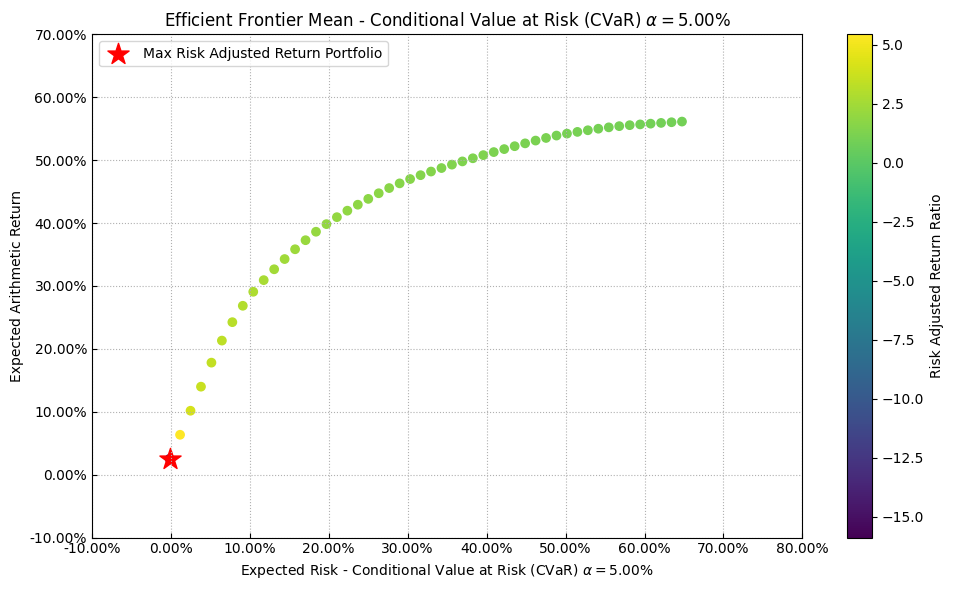

In [ ]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

Calculating Optimal Portfolios for Several Risk Measures

In [ ]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)

w_s.columns = rms

In [ ]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')


,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
ADWYA,0.00%,0.00%,0.00%,0.12%,0.12%,0.00%,0.00%,0.00%,0.14%,0.12%,0.14%,0.01%,0.15%
AETECH,0.00%,0.00%,0.00%,0.01%,0.01%,0.00%,0.00%,0.00%,0.02%,0.01%,0.01%,0.02%,0.01%
AIR LIQUIDE TSIE,0.00%,0.00%,0.00%,0.01%,0.01%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.03%,0.00%
ALKIMIA,0.00%,0.00%,0.00%,0.02%,0.02%,0.00%,0.00%,0.00%,0.02%,0.02%,0.02%,0.02%,0.02%
AMEN BANK,0.00%,0.00%,0.00%,0.04%,0.03%,0.00%,0.00%,0.00%,0.03%,0.03%,0.03%,0.01%,0.03%
AMS,0.00%,0.00%,0.00%,0.02%,0.02%,0.00%,0.00%,0.00%,0.02%,0.02%,0.02%,0.01%,0.02%
ARTES,0.00%,0.00%,0.00%,0.02%,0.02%,0.00%,0.00%,0.00%,0.03%,0.02%,0.03%,0.02%,0.02%
ASS MULTI ITTIHAD,0.00%,0.00%,0.00%,0.01%,0.01%,0.00%,0.00%,0.00%,0.01%,0.02%,0.01%,0.02%,0.01%
ASSAD,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%
ASSUR MAGHREBIA,0.00%,0.00%,0.00%,0.01%,0.01%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.01%,0.00%


Columns: Each column represents a different risk measure for which the optimal portfolio weights are calculated.

Rows: Each row represents a different asset in your portfolio.

For example, looking at the 'CVaR' column (Conditional Value at Risk), the weights indicate the proportion of each asset in the portfolio that maximizes the risk-adjusted return according to the CVaR measure, in the 'CVaR' column, 'SFBT' has the highest weight of 90.88%, indicating that according to the CVaR measure, this asset should have the highest allocation in the portfolio to achieve the optimal risk-return trade-off.

<Axes: >

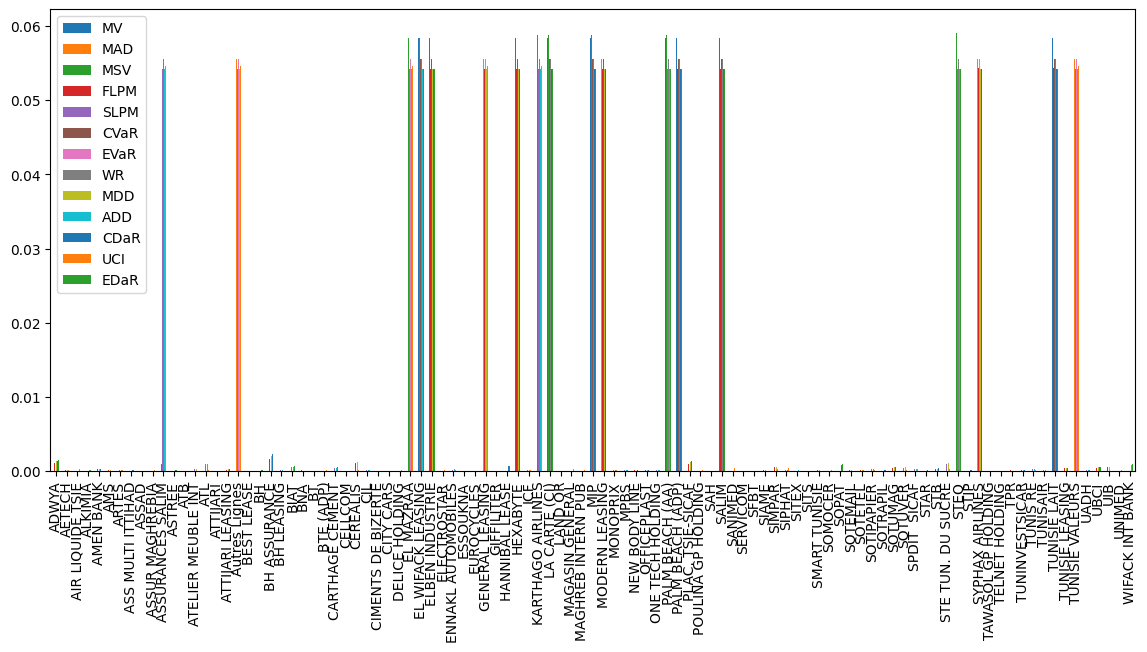

In [ ]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)